# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import model as mdl
import agent as agt
import visualisation as vis

In [120]:
reload(mdl)
reload(agt)
reload(vis)

reload(mdl)
reload(agt)
reload(vis)

<module 'visualisation' from 'd:\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

d:\GitHub\agent-based-modelling\Project\model.py:47: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\GitHub\agent-based-modelling\Project\model.py:51: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))


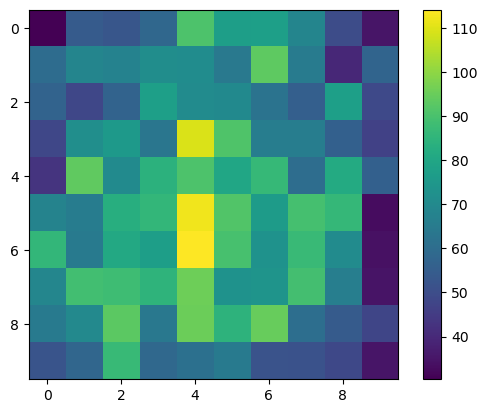

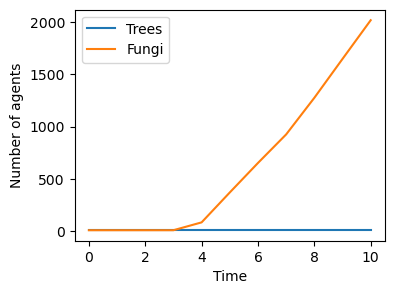

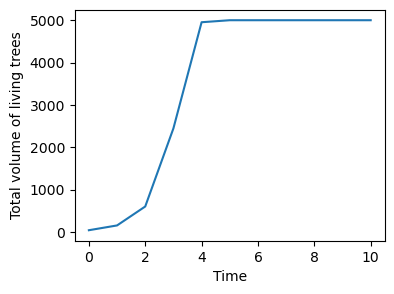

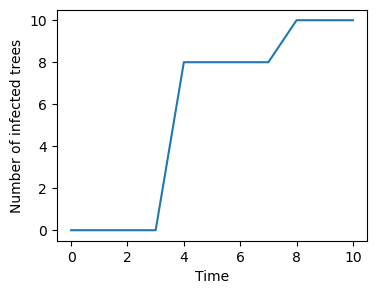

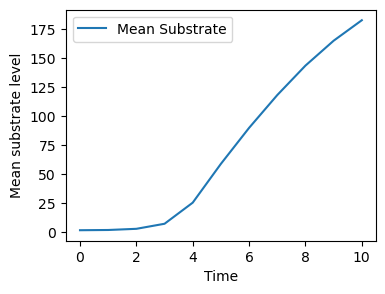

In [122]:
%matplotlib inline

width = 10
height = 10
n_init_trees = 10
n_init_fungi = 10
model = mdl.Forest(width, height, n_init_trees, n_init_fungi)
model.run_model(n_steps=10)

vis.plot_property_layer(model, "soil_fertility")

data = model.datacollector.get_model_vars_dataframe()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Trees", "Fungi"]].plot(ax=ax)
ax.set(xlabel="Time", ylabel="Number of agents")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Living Trees Total Volume"].plot(ax=ax)
ax.set(xlabel="Time", ylabel="Total volume of living trees")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Infected Trees"].plot(ax=ax)
ax.set(xlabel="Time", ylabel="Number of infected trees")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Mean Substrate"]].plot(ax=ax)
ax.set(xlabel="Time", ylabel="Mean substrate level")
plt.show()

In [11]:
reload(vis)
reload(agt)
reload(mdl)

reload(vis)
reload(agt)
reload(mdl)

<module 'model' from 'd:\\GitHub\\agent-based-modelling\\Project\\model.py'>

In [123]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

page = vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi"])

page

d:\GitHub\agent-based-modelling\Project\model.py:47: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\GitHub\agent-based-modelling\Project\model.py:51: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
d:\GitHub\agent-based-modelling\Project\model.py:47: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\GitHub\agent-based-modelling\Project\model.py:51: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))


Cannot show ipywidgets in text